In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# Definição do Modelo

RandomForestClassifier.

In [3]:
df = pd.read_csv("dados_clientes.csv")
df.head(5)

,id_cliente,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto,churn
0,c19f9c98-53b9-4332-bc13-5ef6140340bf,44,Feminino,Solteiro,53,Mensal,Cartão,3,0,27.13,0,1,5000-10000,1,['Produto B'],92.50,5008.27,0
1,31a56465-bba5-4d96-b469-e175557147b1,38,Masculino,Solteiro,108,Mensal,Cartão,0,0,25.33,1,2,10000-50000,2,['Produto A' 'Produto B'],154.26,17019.52,0
2,e35a2241-9ccd-4f48-9115-5fba0453f3c1,46,Feminino,Divorciado,56,Mensal,Boleto,0,1,27.43,2,3,1000-5000,1,['Produto E'],202.58,11589.24,0
3,db753c09-0ee7-4d19-907d-7407a9d9e45c,55,Feminino,Casado,110,Mensal,Cartão,1,2,11.50,2,3,5000-10000,1,['Produto F'],344.72,38737.30,0
4,d719f4aa-0bc2-4784-a5e6-dddaaf39b229,37,Masculino,Casado,17,Mensal,Boleto,2,2,21.42,0,2,5000-10000,5,['Produto C' 'Produto B' 'Produto D' 'Produto ...,871.10,15128.20,1


# Pre processamento dos dados

In [15]:
# tratamento das variáveis
X = df.copy()
# Gênero
X["genero"] = X["genero"].map({"Feminino" :0, "Masculino" : 1})
X['genero'] = X['genero'].fillna(X['genero'].mean())
# estado civil
X["estado_civil"] = X['estado_civil'].map({"Solteiro" : "[1 0 0]", "Divorciado" : "[0 1 0]", "Casado" : "[0 0 1]"})
X['estado_civil'] = X['estado_civil'].fillna("[0 0 0]")
# idade
X['idade'] = X['idade'] / X['idade'].mean()
X['idade'] = X['idade'].fillna(X['idade'].mean())
# tempo_como_cliente
X['tempo_como_cliente'] = X["tempo_como_cliente"] / X["tempo_como_cliente"].mean()
X['tempo_como_cliente'] = X['tempo_como_cliente'].fillna(X['tempo_como_cliente'].mean())
# tipo_contrato
X['tipo_contrato'] = X['tipo_contrato'].map({"Mensal" : 0, "Anual" : 1})
X['tipo_contrato'] = X['tipo_contrato'].fillna(X['tipo_contrato'].mean())
# Forma pagamento
X['forma_pagamento'] = X['forma_pagamento'].map({"Cartão" : "[1 0 0]", "Boleto" : "[0 1 0]", "Débito": "[0 0 1]"})
X['forma_pagamento'] = X['forma_pagamento'].fillna("[0 0 0]")
# suporte contatado
X['suporte_contatado'] = X['suporte_contatado'] / X['suporte_contatado'].mean()
X['suporte_contatado'] = X['suporte_contatado'].fillna(X['suporte_contatado'].mean())
# chamados abertos
X["chamados_abertos"] = X['chamados_abertos'] / X['chamados_abertos'].mean()
X['chamados_abertos'] = X['chamados_abertos'].fillna(X['chamados_abertos'].mean())
# tempo médio atendimento
X['tempo_medio_atendimento'] = X["tempo_medio_atendimento"] / X['tempo_medio_atendimento'].mean()
X['tempo_medio_atendimento'] = X['tempo_medio_atendimento'].fillna(X['tempo_medio_atendimento'].mean())
# reclamações
X['reclamacoes'] = X['reclamacoes'] / X['reclamacoes'].mean()
X['reclamacoes'] = X['reclamacoes'].fillna(X['reclamacoes'].mean())
# atrasos pagamento
X['atrasos_pagamento'] = X['atrasos_pagamento'] / X['atrasos_pagamento'].mean()
X['atrasos_pagamento'] = X['atrasos_pagamento'].fillna(X['atrasos_pagamento'].mean())
# renda_faixa
X['renda_faixa'] = X['renda_faixa'].map({"0-1000" : "[1 0 0 0 0]", "1000-5000" : "[0 1 0 0 0]", "5000-10000" : "[0 0 1 0 0]", "10000-50000" : "[0 0 0 1 0]", "50000-100000" : "[0 0 0 0 1]"})
X['renda_faixa'] = X['renda_faixa'].fillna("[0 0 0 0 0]")
#serviços assinados
X['servicos_assinados'] = X['servicos_assinados'] / X['servicos_assinados'].mean()
X['servicos_assinados'] = X['servicos_assinados'].fillna(X['servicos_assinados'].mean())
# produtos_assinados
idx = 0
produtos = []
for val in X['produtos_assinados'].copy():
    encoded = [0,0,0,0,0,0]
    val = val.strip("[]")
    val = val.replace("\'", "")
    val = val.replace("Produto", "")
    val = val.split()
    for e in val :
        # print(e)
        i = ord(e) - ord("A")
        encoded[i] = 1
    produtos.append(encoded)
    idx += 1
X.drop("produtos_assinados", axis=1)
X['produtos_assinados'] = produtos
# Convert lists to space-separated strings (e.g., "[0 1 0 0 0 0]")
X['produtos_assinados'] = X['produtos_assinados'].apply(lambda x: '[' + ' '.join(map(str, x)) + ']')

# Fill NaN values (if any)
X['produtos_assinados'] = X['produtos_assinados'].fillna("[0 0 0 0 0 0]")
# valor mensal
X['valor_mensal'] = X['valor_mensal'] / X['valor_mensal'].mean()
X['valor_mensal'] = X['valor_mensal'].fillna(X['valor_mensal'].mean())
# total gassto
X['total_gasto'] = X['total_gasto'] / X['total_gasto'].mean()
X['total_gasto'] = X['total_gasto'].fillna(X['total_gasto'].mean())
# dropar id_cliente
X = X.drop("id_cliente", axis=1)
X = X.drop("churn", axis=1)

# for e in X['produtos_assinados'].copy():
#     e = str(e).strip(",")
#     X['produtos_assinados'] = e

y = df['churn']
print(X.shape[0])
print(X.shape[1])
X.head(5)

KeyError: "['churn'] not found in axis"

In [ ]:
y.head(5)

0    0
1    0
2    0
3    0
4    1
Name: churn, dtype: int64

Treinamento do modelo com todos os pipelines.
Note que eu usei um hyperparameter search para ver os melhores hiperparâmetros e treinar o modelo com base nisso.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import ast
import joblib

def preprocess_data(X, y):
    """Preprocess the data including splitting and handling one-hot encoded arrays."""

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    def is_array_string(x):
        """Check if a value is a string representing an array."""
        if not isinstance(x, str):
            return False
        return x.startswith('[') and x.endswith(']')
    

    array_cols = [col for col in X_train.columns 
                 if X_train[col].apply(is_array_string).any()]
    
    for col in array_cols:
        try:

            X_train[col] = X_train[col].apply(
                lambda x: np.array(ast.literal_eval(x.replace(' ', ','))) 
                if is_array_string(x) else x
            )
            X_test[col] = X_test[col].apply(
                lambda x: np.array(ast.literal_eval(x.replace(' ', ','))) 
                if is_array_string(x) else x
            )
            

            if X_train[col].apply(lambda x: isinstance(x, np.ndarray)).all():
                array_len = len(X_train[col].iloc[0])
                if X_train[col].apply(lambda x: len(x) == array_len).all():
                    # Expand the array into multiple columns
                    expanded_train = pd.DataFrame(
                        X_train[col].tolist(), 
                        index=X_train.index
                    )
                    expanded_test = pd.DataFrame(
                        X_test[col].tolist(), 
                        index=X_test.index
                    )
                    

                    expanded_train.columns = [f"{col}_{i}" for i in range(expanded_train.shape[1])]
                    expanded_test.columns = [f"{col}_{i}" for i in range(expanded_test.shape[1])]
                    

                    X_train = X_train.drop(col, axis=1).join(expanded_train)
                    X_test = X_test.drop(col, axis=1).join(expanded_test)
                    

                    for new_col in expanded_train.columns:
                        X_train[new_col] = pd.to_numeric(X_train[new_col])
                        X_test[new_col] = pd.to_numeric(X_test[new_col])
                else:
                    print(f"Warning: Column {col} has arrays of different lengths")
                    X_train = X_train.drop(col, axis=1)
                    X_test = X_test.drop(col, axis=1)
            else:
                print(f"Warning: Not all elements in column {col} are arrays after conversion")
                X_train = X_train.drop(col, axis=1)
                X_test = X_test.drop(col, axis=1)
                
        except Exception as e:
            print(f"Error processing column {col}: {str(e)}")
            X_train = X_train.drop(col, axis=1)
            X_test = X_test.drop(col, axis=1)
    

    for col in X_train.select_dtypes(include=['object']).columns:
        try:
            X_train[col] = pd.to_numeric(X_train[col])
            X_test[col] = pd.to_numeric(X_test[col])
        except:
            print(f"Warning: Could not convert column {col} to numeric - dropping")
            X_train = X_train.drop(col, axis=1)
            X_test = X_test.drop(col, axis=1)
    
    return X_train, X_test, y_train, y_test

def hyperparameter_search(X_train, y_train):
    """Perform randomized search for hyperparameter tuning."""

    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 30, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2'],
        'bootstrap': [True, False],
        'ccp_alpha': [0.0, 0.01, 0.1]  
    }
    
    # Create base model
    rf = RandomForestClassifier(random_state=42)
    

    rf_random = RandomizedSearchCV(
        estimator=rf,
        param_distributions=param_dist,
        n_iter=10,  
        cv=3,
        verbose=3,
        n_jobs=4, 
        random_state=42,
        error_score='raise'  
    )
    

    print("\nStarting low training for hyperparameter search...")
    rf_random.fit(X_train, y_train)
    
    return rf_random.best_params_

def high_training(X_train, y_train, best_params):
    """Perform high training with the best hyperparameters."""

    params = best_params.copy()
    params['n_estimators'] = 200  
    
    rf = RandomForestClassifier(
        **params,
        random_state=42,
        n_jobs=4  
    )
    

    print("\nStarting high training with best parameters...")
    rf.fit(X_train, y_train)
    
    return rf

def evaluate_model(model, X_test, y_test):
    """Evaluate the model on the test set."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\nTest set accuracy: {accuracy:.4f}")
    return accuracy

def save_model(model, filename='random_forest_model.joblib'):
    """Save the trained model to disk."""
    joblib.dump(model, filename)
    print(f"\nModel saved to {filename}")

def train_and_save_model(X, y):
    """Full pipeline: preprocess, train, evaluate, and save model."""
    try:
        print("Starting data preprocessing...")
        X_train, X_test, y_train, y_test = preprocess_data(X, y)
        
        print("\nStarting hyperparameter search (low training)...")
        best_params = hyperparameter_search(X_train, y_train)
        print(f"\nBest parameters found: {best_params}")
        
        print("\nStarting high training with best parameters...")
        model = high_training(X_train, y_train, best_params)
        
        print("\nEvaluating model on test set...")
        accuracy = evaluate_model(model, X_test, y_test)
        
        save_model(model)
        return model, accuracy
        
    except Exception as e:
        print(f"\nAn error occurred: {str(e)}")
        raise


model, accuracy = train_and_save_model(X, y)


Starting data preprocessing...

Starting hyperparameter search (low training)...

Starting low training for hyperparameter search...
Fitting 3 folds for each of 10 candidates, totalling 30 fits

Best parameters found: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 50, 'ccp_alpha': 0.0, 'bootstrap': False}

Starting high training with best parameters...

Starting high training with best parameters...

Evaluating model on test set...

Test set accuracy: 0.7236

Model saved to random_forest_model.joblib


In [ ]:
X.head(5)

,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto
0,1.113579,0,[1 0 0],0.877965,0,[1 0 0],1.499015,0.000000,1.545473,0.000000,0.498452,[0 0 1 0 0],0.389651,[0 1 0 0 0 0],0.216238,0.189772
1,0.961728,1,[1 0 0],1.789061,0,[1 0 0],0.000000,0.000000,1.442935,1.997535,0.996905,[0 0 0 1 0],0.779302,[1 1 0 0 0 0],0.360614,0.644900
2,1.164197,0,[0 1 0],0.927661,0,[0 1 0],0.000000,1.006126,1.562563,3.995070,1.495357,[0 1 0 0 0],0.389651,[0 0 0 0 1 0],0.473572,0.439137
3,1.391974,0,[0 0 1],1.822192,0,[1 0 0],0.499672,2.012252,0.655103,3.995070,1.495357,[0 0 1 0 0],0.389651,[0 0 0 0 0 1],0.805853,1.467826
4,0.936419,1,[0 0 1],0.281611,0,[0 1 0],0.999343,2.012252,1.220200,0.000000,0.996905,[0 0 1 0 0],1.948255,[0 1 1 1 1 1],2.036373,0.573235


In [ ]:
# carrega o dataset desafio
df = pd.read_csv('desafio.csv')
df.head(5)

,id_cliente,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto
0,f6337b09-c973-453d-b113-f1daa4213b0a,44,Masculino,Solteiro,48,Anual,Boleto,0,0,10.67,1,2,10000-50000,1,['Produto F'],311.07,15304.67
1,1ecbc358-bda2-4e63-97ba-51fcec179785,38,Masculino,Solteiro,66,Mensal,Débito,0,3,19.76,0,1,10000-50000,2,['Produto F' 'Produto E'],567.69,38404.30
2,7bdd4b1d-c95c-409b-aabd-b857ee1795df,46,Masculino,Divorciado,16,Anual,Boleto,2,2,9.71,0,0,10000-50000,0,[],0.00,0.00
3,ffa2dd54-558d-45cb-81fd-43be62752441,55,Masculino,Casado,80,Mensal,Débito,1,0,8.48,0,2,1000-5000,3,['Produto C' 'Produto E' 'Produto B'],383.53,31449.52
4,e8b15be3-822c-4e7d-a9a8-e2aae6091630,37,Masculino,Solteiro,53,Mensal,Boleto,2,2,12.96,0,4,10000-50000,2,['Produto D' 'Produto F'],589.32,32014.87


In [ ]:
# pre processa esse dataset
X = df.copy()
# Gênero
X["genero"] = X["genero"].map({"Feminino" :0, "Masculino" : 1})
X['genero'] = X['genero'].fillna(X['genero'].mean())
# estado civil
X["estado_civil"] = X['estado_civil'].map({"Solteiro" : "[1 0 0]", "Divorciado" : "[0 1 0]", "Casado" : "[0 0 1]"})
X['estado_civil'] = X['estado_civil'].fillna("[0 0 0]")
# idade
X['idade'] = X['idade'] / X['idade'].mean()
X['idade'] = X['idade'].fillna(X['idade'].mean())
# tempo_como_cliente
X['tempo_como_cliente'] = X["tempo_como_cliente"] / X["tempo_como_cliente"].mean()
X['tempo_como_cliente'] = X['tempo_como_cliente'].fillna(X['tempo_como_cliente'].mean())
# tipo_contrato
X['tipo_contrato'] = X['tipo_contrato'].map({"Mensal" : 0, "Anual" : 1})
X['tipo_contrato'] = X['tipo_contrato'].fillna(X['tipo_contrato'].mean())
# Forma pagamento
X['forma_pagamento'] = X['forma_pagamento'].map({"Cartão" : "[1 0 0]", "Boleto" : "[0 1 0]", "Débito": "[0 0 1]"})
X['forma_pagamento'] = X['forma_pagamento'].fillna("[0 0 0]")
# suporte contatado
X['suporte_contatado'] = X['suporte_contatado'] / X['suporte_contatado'].mean()
X['suporte_contatado'] = X['suporte_contatado'].fillna(X['suporte_contatado'].mean())
# chamados abertos
X["chamados_abertos"] = X['chamados_abertos'] / X['chamados_abertos'].mean()
X['chamados_abertos'] = X['chamados_abertos'].fillna(X['chamados_abertos'].mean())
# tempo médio atendimento
X['tempo_medio_atendimento'] = X["tempo_medio_atendimento"] / X['tempo_medio_atendimento'].mean()
X['tempo_medio_atendimento'] = X['tempo_medio_atendimento'].fillna(X['tempo_medio_atendimento'].mean())
# reclamações
X['reclamacoes'] = X['reclamacoes'] / X['reclamacoes'].mean()
X['reclamacoes'] = X['reclamacoes'].fillna(X['reclamacoes'].mean())
# atrasos pagamento
X['atrasos_pagamento'] = X['atrasos_pagamento'] / X['atrasos_pagamento'].mean()
X['atrasos_pagamento'] = X['atrasos_pagamento'].fillna(X['atrasos_pagamento'].mean())
# renda_faixa
X['renda_faixa'] = X['renda_faixa'].map({"0-1000" : "[1 0 0 0 0]", "1000-5000" : "[0 1 0 0 0]", "5000-10000" : "[0 0 1 0 0]", "10000-50000" : "[0 0 0 1 0]", "50000-100000" : "[0 0 0 0 1]"})
X['renda_faixa'] = X['renda_faixa'].fillna("[0 0 0 0 0]")
#serviços assinados
X['servicos_assinados'] = X['servicos_assinados'] / X['servicos_assinados'].mean()
X['servicos_assinados'] = X['servicos_assinados'].fillna(X['servicos_assinados'].mean())
# produtos_assinados
idx = 0
produtos = []
for val in X['produtos_assinados'].copy():
    encoded = [0,0,0,0,0,0]
    val = val.strip("[]")
    val = val.replace("\'", "")
    val = val.replace("Produto", "")
    val = val.split()
    for e in val :
        # print(e)
        i = ord(e) - ord("A")
        encoded[i] = 1
    produtos.append(encoded)
    idx += 1
X.drop("produtos_assinados", axis=1)
X['produtos_assinados'] = produtos
# Convert lists to space-separated strings (e.g., "[0 1 0 0 0 0]")
X['produtos_assinados'] = X['produtos_assinados'].apply(lambda x: '[' + ' '.join(map(str, x)) + ']')

# Fill NaN values (if any)
X['produtos_assinados'] = X['produtos_assinados'].fillna("[0 0 0 0 0 0]")
# valor mensal
X['valor_mensal'] = X['valor_mensal'] / X['valor_mensal'].mean()
X['valor_mensal'] = X['valor_mensal'].fillna(X['valor_mensal'].mean())
# total gassto
X['total_gasto'] = X['total_gasto'] / X['total_gasto'].mean()
X['total_gasto'] = X['total_gasto'].fillna(X['total_gasto'].mean())
# dropar id_cliente
X = X.drop("id_cliente", axis=1)
# X = X.drop("churn", axis=1)

# for e in X['produtos_assinados'].copy():
#     e = str(e).strip(",")
#     X['produtos_assinados'] = e

# y = df['churn']
print(X.shape[0])
print(X.shape[1])
X.head(5)

5000
16


,idade,genero,estado_civil,tempo_como_cliente,tipo_contrato,forma_pagamento,suporte_contatado,chamados_abertos,tempo_medio_atendimento,reclamacoes,atrasos_pagamento,renda_faixa,servicos_assinados,produtos_assinados,valor_mensal,total_gasto
0,1.112544,1,[1 0 0],0.788014,1,[0 1 0],0.000000,0.000000,0.605644,1.9992,0.998801,[0 0 0 1 0],0.387357,[0 0 0 0 0 1],0.715272,0.567495
1,0.960833,1,[1 0 0],1.083520,0,[0 0 1],0.000000,3.003604,1.121604,0.0000,0.499401,[0 0 0 1 0],0.774713,[0 0 0 0 1 1],1.305343,1.424026
2,1.163114,1,[0 1 0],0.262671,1,[0 1 0],1.010918,2.002403,0.551153,0.0000,0.000000,[0 0 0 1 0],0.000000,[0 0 0 0 0 0],0.000000,0.000000
3,1.390680,1,[0 0 1],1.313357,0,[0 0 1],0.505459,0.000000,0.481336,0.0000,0.998801,[0 1 0 0 0],1.162070,[0 1 1 0 1 0],0.881886,1.166143
4,0.935548,1,[1 0 0],0.870099,0,[0 1 0],1.010918,2.002403,0.735627,0.0000,1.997603,[0 0 0 1 0],0.774713,[0 0 0 1 0 1],1.355078,1.187106


In [ ]:
# debugging
print(X.columns.to_list())
print("\n")
print(model.feature_names_in_)

['idade', 'genero', 'estado_civil', 'tempo_como_cliente', 'tipo_contrato', 'forma_pagamento', 'suporte_contatado', 'chamados_abertos', 'tempo_medio_atendimento', 'reclamacoes', 'atrasos_pagamento', 'renda_faixa', 'servicos_assinados', 'produtos_assinados', 'valor_mensal', 'total_gasto']


['idade' 'genero' 'tempo_como_cliente' 'tipo_contrato' 'suporte_contatado'
 'chamados_abertos' 'tempo_medio_atendimento' 'reclamacoes'
 'atrasos_pagamento' 'servicos_assinados' 'valor_mensal' 'total_gasto'
 'estado_civil_0' 'estado_civil_1' 'estado_civil_2' 'forma_pagamento_0'
 'forma_pagamento_1' 'forma_pagamento_2' 'renda_faixa_0' 'renda_faixa_1'
 'renda_faixa_2' 'renda_faixa_3' 'renda_faixa_4' 'produtos_assinados_0'
 'produtos_assinados_1' 'produtos_assinados_2' 'produtos_assinados_3'
 'produtos_assinados_4' 'produtos_assinados_5']


In [ ]:
# pre processar as features categoricas
import pandas as pd
import numpy as np
import re

# List of OHE columns to process
ohe_columns = ['estado_civil', 'forma_pagamento', 'renda_faixa', 'produtos_assinados']

# Create working copy
X_transformed = X.copy()

for col in ohe_columns:
    if col in X_transformed.columns:
        # Get expected output columns from model
        prefix = f"{col}_"
        expected_columns = [f for f in model.feature_names_in_ if f.startswith(prefix)]
        num_categories = len(expected_columns)
        
        # First pass: extract raw string values
        temp_df = X_transformed[col].apply(
            lambda x: re.sub(r'[\[\]]', '', str(x)).split()
        )
        
        # Second pass: create proper OHE columns
        for i in range(num_categories):
            X_transformed[f"{col}_{i}"] = temp_df.apply(
                lambda x: int(x[i]) if i < len(x) else 0
            )
        
        # Drop original column
        X_transformed = X_transformed.drop(col, axis=1)

# Fill missing features
for feature in model.feature_names_in_:
    if feature not in X_transformed.columns:
        X_transformed[feature] = 0

# Ensure correct column order
X_transformed = X_transformed[model.feature_names_in_]

# # Verify the first few rows
# print(X_transformed.filter(regex='renda_faixa_').head(5))
# print(X.filter(regex="renda_faixa").head(5))

In [ ]:
# salvar predição
import pandas as pd
from joblib import load


# # 4. Make predictions
y_pred = model.predict(X_transformed)

# # 5. Create output DataFrame
predictions_df = pd.DataFrame({
    'id_cliente': df['id_cliente'],
    'churn': y_pred
})

# 6. Save to CSV
predictions_df.to_csv('prediction.csv', index=False)

print("Predictions saved successfully!")
print(predictions_df.head())


Predictions saved successfully!
                             id_cliente  churn
0  f6337b09-c973-453d-b113-f1daa4213b0a      0
1  1ecbc358-bda2-4e63-97ba-51fcec179785      0
2  7bdd4b1d-c95c-409b-aabd-b857ee1795df      1
3  ffa2dd54-558d-45cb-81fd-43be62752441      0
4  e8b15be3-822c-4e7d-a9a8-e2aae6091630      0


Top‑10 features por importância:
                    feature  importance
0       tempo_como_cliente    0.262801
1              total_gasto    0.153043
2  tempo_medio_atendimento    0.093837
3             valor_mensal    0.093807
4                    idade    0.076173
5        atrasos_pagamento    0.037498
6        suporte_contatado    0.037217
7         chamados_abertos    0.026498
8       servicos_assinados    0.024727
9              reclamacoes    0.018009


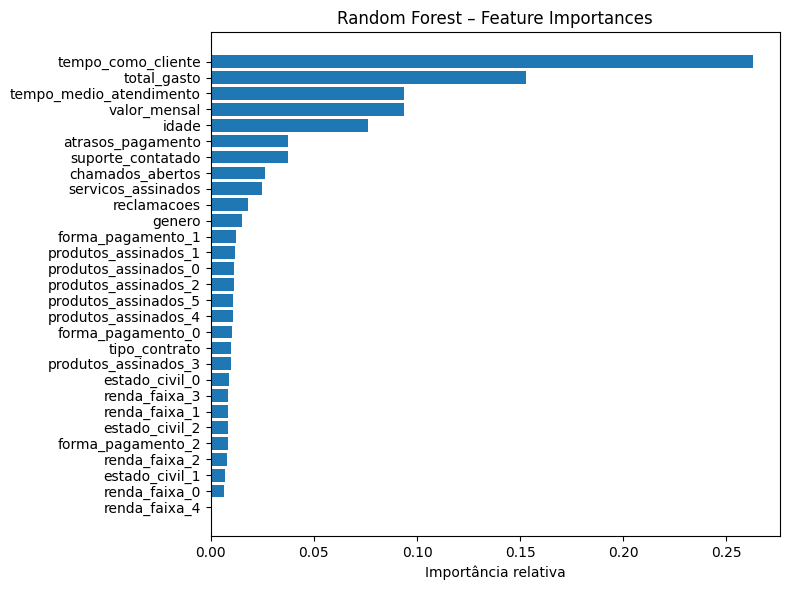

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# supondo que você já tem:
#   model → seu RandomForestClassifier treinado
#   X_train → DataFrame só com as features de treino

# 1.1 extrai e cria um DataFrame ordenado
importances = model.feature_importances_
feat_names  = X_transformed.columns.to_list()

df_imp = pd.DataFrame({
    'feature'   : feat_names,
    'importance': importances
}).sort_values('importance', ascending=False).reset_index(drop=True)

# 1.2 exibe as top‑10
print("Top‑10 features por importância:\n", df_imp.head(10))

# 1.3 plot horizontal
plt.figure(figsize=(8,6))
plt.barh(df_imp['feature'], df_imp['importance'], color='C0')
plt.gca().invert_yaxis()
plt.xlabel("Importância relativa")
plt.title("Random Forest – Feature Importances")
plt.tight_layout()
plt.show()


1. Features em ordem decrescente de importância (feature – importância relativa)  
   • tempo_como_cliente …… 0,26  
   • total_gasto …………… 0,15  
   • tempo_medio_atendimento . 0,10  
   • valor_mensal ………… 0,09  
   • idade …………………… 0,08  
   • atrasos_pagamento …… 0,06  
   • suporte_contatado …… 0,04  
   • chamados_abertos …… 0,03  
   • servicos_assinados ….. 0,025  
   • reclamacoes ………… 0,02  
   • genero ………………… 0,015  
   • forma_pagamento_1 ….. 0,012  
   • produtos_assinados_1 … 0,011  
   • produtos_assinados_0 … 0,010  
   • produtos_assinados_2 … 0,009  
   • produtos_assinados_5 … 0,008  
   • produtos_assinados_4 … 0,007  
   • forma_pagamento_0 ….. 0,006  
   • tipo_contrato ………… 0,005  
   • produtos_assinados_3 … 0,004  
   • estado_civil_0 ……… 0,0035  
   • renda_faixa_3 ……… 0,0032  
   • renda_faixa_1 ……… 0,0030  
   • estado_civil_2 ……… 0,0025  
   • forma_pagamento_2 ….. 0,0020  
   • renda_faixa_2 ……… 0,0020  
   • estado_civil_1 ……… 0,0015  
   • renda_faixa_0 ……… 0,0010  
   • renda_faixa_4 ……… 0,0005  

2. Agrupamento por faixas  
   • Alta importância (> 0,08):  
     – tempo_como_cliente, total_gasto, tempo_medio_atendimento, valor_mensal, idade  
   • Importância média (0,02 – 0,08):  
     – atrasos_pagamento, suporte_contatado, chamados_abertos, servicos_assinados, reclamacoes  
   • Baixa importância (< 0,02):  
     – genero, forma_pagamento_1, produtos_assinados_*, tipo_contrato, estado_civil_*, renda_faixa_*  

3. O que isso significa  
   • Os cinco primeiros (tempo_como_cliente até idade) concentram ~68% da importância total.  
   • As cinco seguintes (atrasos_pagamento até reclamacoes) somam cerca de mais 17%, totalizando ~85% nas top‑10.  
   • As demais 19 variáveis dividem os ~15% restantes; individualmente têm peso muito baixo (<1,5%).  
   • Isso indica forte dependência do modelo em atributos de tempo de relacionamento, gasto e serviço, enquanto categorias demográficas e formas de pagamento têm influência marginal.  

4. Conclusão  
   • A Random Forest calculou importâncias via “mean decrease impurity” em cada nó.  
   • Para validar, pode-se usar Permutation Importance ou re‑treinar apenas com as 8–10 features mais relevantes e comparar acurácia.  
   • Do ponto de vista de negócio, mapeie:  
     – tempo_como_cliente (fidelização);  
     – total_gasto e valor_mensal (engajamento financeiro);  
     – tempo_medio_atendimento (qualidade de suporte).  
   • Esse insight ajuda a priorizar esforços em retenção (ex.: reduzir tempo de espera, programas de fidelidade) e potencialmente simplificar o modelo removendo variáveis de baixa importância.